For this project, Amazon Reviews for Apparel were retreived from https://huggingface.co/datasets/amazon_us_reviews

This project was inspired by discussions about the lack of functional pockets in Women's Pants.

We wanted to perform sentiment analysis on Men's Pants, Women's Pants, and Genderless Pants to see what features are associated with positive and negative reviews in each category, and what the most important features are.

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/AmazonPantsData_Medium'

# Load Amazon reviews from CSV
start = time.time()
no_pants = pd.read_csv('med_genderless_pant.csv')
girl_pants = pd.read_csv('med_girl_pant.csv')
boy_pants = pd.read_csv('med_boy_pant.csv')

/content/drive/MyDrive/Colab Notebooks/AmazonPantsData_Medium


Machines process or "read" text through NLP, natural language processing, aka computational linguistics. NLP uses linguistic analysis,explained emotions, and grammatical structure to convert text to analytical data, and infer intent from text. NLP is used in language translation.

Different methodologies are used by NLP to process nuances in human language, including:


* information retrieval
* vocabulary analysis to research word frequency distribution
* pattern recognition
* tagging and indexing
* information extraction
* data mining technology


Text mining uses techniques like Naïve Bayes, Support Vector Machines (SVM) to transform unstructured text into a structured format, and analyze frequency of words to identify any underlying trends and relationships.

* [Samsung provided some resources to understand NLP:
Natural Language Processing: Pretraining (Chapter 15) of the Dive Into Learning Online Textbook.](https://d2l.ai/chapter_natural-language-processing-pretraining/index.html)

* [Natural Language Processing: Applications (Chapter 16) of the Dive Into Learning Online Textbook. ](https://d2l.ai/chapter_natural-language-processing-applications/index.html)

An inspiration for this project is the dialogue around the quality of men's and women's pants. Women's pants are often criticized for having small, non-functional pockets. It would be interesting to see if this dialogue is reflected in the Amazon Reviews.

Our goal in this project is to:
* Process text from Amazon reviews in order to extract any information that can answer our question
* Use NLP to process, analyze, structure, and find patterns in the Amazon reviews


The corpus in this project, ie the text dataset subject to analysis and ML for this project, is Amazon Reviews from HuggingFace database, stored in a dictionary and converted into a CSV.

Raw corpus: text data stored in HuggingFace database
Tagged corpus: text data where words and phrases have been labeled according to a model.


In [ ]:
import string
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk import classify
from nltk import NaiveBayesClassifier

In [ ]:
len(no_pants.index)
#len(girl_pants.index)
#len(boy_pants.index)

17118

In [ ]:
#no_pants.head()
#girl_pants.head()
boy_pants.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'marketplace', 'customer_id', 'review_id',
       'product_id', 'product_parent', 'product_title', 'product_category',
       'star_rating', 'helpful_votes', 'total_votes', 'vine',
       'verified_purchase', 'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [ ]:
#creating a new DF with just important information
no_pants_df = no_pants[['product_title','star_rating', 'review_headline', 'review_body']].copy()
girl_pants_df = girl_pants[['product_title','star_rating', 'review_headline', 'review_body']].copy()
boy_pants_df = boy_pants[['product_title','star_rating', 'review_headline', 'review_body']].copy()

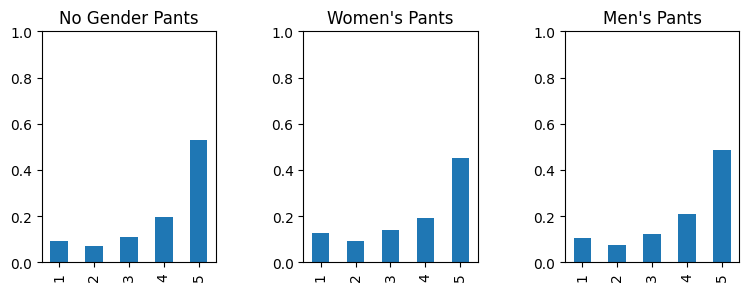

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))

#plt.subplot(1, 3, 1) # row 1, col 2 index 1
no_pants_df['star_rating'].value_counts(normalize=True).sort_index().plot(kind='bar',ylim=(0, 1), ax=ax1)

#plt.subplot(1, 3, 2) #"a 1-row, 3-column figure: go to the second subplot."
girl_pants_df['star_rating'].value_counts(normalize=True).sort_index().plot(kind='bar',ylim=(0, 1) ,ax=ax2)

#plt.subplot(1, 3, 3) # index 3
boy_pants_df['star_rating'].value_counts(normalize=True).sort_index().plot(kind='bar',ylim=(0, 1) ,ax=ax3)

ax1.set_title("No Gender Pants")
ax2.set_title("Women's Pants")
ax3.set_title("Men's Pants")
fig.subplots_adjust(wspace=.5)

plt.show()
plt.tight_layout()
#https://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/

# Hypothesis

From the distribution of Star Ratings for Pants by Gender in the graphs above, we can see that Women's Pants have more Low Reviews (Rating 1) compared to Men's Pants. We want to find out WHY?

It is also interesting that Pants without Gender in the Product Title have more High Star Ratings and less Low Star Ratings than pants made for Women or Men.

Women's Pants tend to focus on body-hugging, which is where issues can arise as shape is very much individual, while No Gender Pants and Men Pants are less likely to focus on exact fit.

NLP processes:

1.   tokenization: separate text into words and sentences
2.   normalization: convert similar words into uniform sequences, using lemmatization and stemming
3.   cleaning: remove noise in data

Python’s Natural Language Toolkit (nlkt) tokenizers, which differ in how they handle punctuation:

* word_tokenize: creates a single token out of a punctuation mark, one or more adjacent letters
* WordPunctTokenizer: each punctuation mark is its own token
* text_to_word_sequence: ignores punctuation between words, keeps words with punctuation intact

pre-processing techniques:

* Tokenization
* Stop words
* Part of Speech (POS) Tagging
* Integer Encoding
* Padding
* One-Hot Encoding


In [ ]:
#The score category ranges from 1-5
#1 and 2 will be assigned as negative reviews
#4 and 5 will be assigned as positive reviews,
#3 will be omitted

#going to check out No Gender Pants first

pos_reviews = no_pants_df.loc[no_pants_df['star_rating'] > 3]
neg_reviews = no_pants_df.loc[no_pants_df['star_rating'] < 3]

#inserting a column into dataframe for labeling, so boolean mask can filter more easily later
pos_reviews.insert(0,'Rating','High')
neg_reviews.insert(0,'Rating','Low')

#combining into a single dataframe
posneg_reviews = pd.concat([pos_reviews,neg_reviews], ignore_index=True)
posneg_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15248 entries, 0 to 15247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rating           15248 non-null  object
 1   product_title    15248 non-null  object
 2   star_rating      15248 non-null  int64 
 3   review_headline  15248 non-null  object
 4   review_body      15247 non-null  object
dtypes: int64(1), object(4)
memory usage: 595.8+ KB


In [ ]:
#pos_reviews.head()

#checking for nulls in No Gender Pants reviews
posneg_reviews['review_body'].isnull().sum()

# reviews = = posneg_reviews[posneg_reviews['review_body'].notna()]
# posneg_reviews.head()
posneg_reviews['Rating'].value_counts()

High    12450
Low      2798
Name: Rating, dtype: int64

In [ ]:
pos_df = posneg_reviews.loc[posneg_reviews['Rating']== 'High']
pos_list = pos_df['review_body'].tolist()

neg_df = posneg_reviews.loc[posneg_reviews['Rating']== 'Low']
neg_list = neg_df['review_body'].tolist()

# looking at first 5 reviews
pos_list[:5]
neg_list[:5]

['To small',
 'The right leg is 2&#34; longer than the left!! AND dirty. The waist is also too large is gonna slide down while exercising. Quality very flimsy. Product is eligible for return but I have to pay shipping myself meaning I pay 2X shipping for nothing!! Looks as I am stuck with them and have to find a way to take them in or donate them to the thrift store.',
 'These were SO small, like 10 year old child small. No one I knew could wear them and on top of that the material was rough and practically see through.',
 "Nothing like what is pictured...... Don't waste ur money",
 'for the pairs that fit they are great, light for summer in the south but only half of them fit!']

Cleaning and Pre-Processing

In [ ]:
pos_list_str = [str(i) for i in pos_list]
neg_list_str = [str(i) for i in neg_list]

# lowercase
pos_list_lowered = [word.lower() for word in pos_list_str]
neg_list_lowered = [word.lower() for word in neg_list_str]

pos_list_lowered[:1]
#neg_list_lowered[:1]

['i love these thicker training pants.  they look like regular underwear, but are extra absorbent.  my son has been day time potty trained for months, but he still wears these training pants.  he paricularly likes the ones with the cars on them.  they are hard to find in the stores, too, so i am glad i found them on amazon.']

In [ ]:
# "bag of words" to divide indicator words for classifier, to train classifer
# turn list into string
# using list comprehension

pos_list_to_string = ' '.join([str(elem) for elem in pos_list_lowered])
neg_list_to_string = ' '.join([str(elem) for elem in neg_list_lowered])

#pos_list_to_string

'i love these thicker training pants.  they look like regular underwear, but are extra absorbent.  my son has been day time potty trained for months, but he still wears these training pants.  he paricularly likes the ones with the cars on them.  they are hard to find in the stores, too, so i am glad i found them on amazon. love this outfit on my little man. fits well and is very soft finding work pants that fit my husband is always a challenge. these are exactly what he needs for his job and there were ample size selections. they fit exactly as expected. i was expecting some thicker sweatpants but they are alright. they are straight pants so if you like those type of pants, this one is good. it is originally a marvel brand so that\'s great! i bought this for my best friend since she loves loki and i think she is going to be happy overall. very lightweight & comfortable! good price and quality. i was worried about them being see through because the only yoga pants i have are the normal 

In [ ]:
# NLTK list of stop words and punctuation in English, in "stop"
nltk.download('stopwords')
stop = set(stopwords.words('english') + list(string.punctuation))

# NLTK WhiteSpace Tokenizer to tokenize data, splits and remove whitespace
tokenizer = WhitespaceTokenizer()

filtered_pos_list = [w for w in tokenizer.tokenize(pos_list_to_string) if w not in stop]
filtered_neg_list = [w for w in tokenizer.tokenize(neg_list_to_string) if w not in stop]

#filtered_pos_list[:10]
# still has periods
# using RegEx to remove periods

filtered_pos_list2 = [w.strip(string.punctuation) for w in filtered_pos_list]
filtered_neg_list2 = [w.strip(string.punctuation) for w in filtered_neg_list]

filtered_pos_list2[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['love',
 'thicker',
 'training',
 'pants',
 'look',
 'like',
 'regular',
 'underwear',
 'extra',
 'absorbent']

In [ ]:
# NLTK Frequency Distribution to preview most common words in each list
# there may be synonyms

fd_pos = nltk.FreqDist(filtered_pos_list2)
fd_neg = nltk.FreqDist(filtered_neg_list2)

#fd_pos.most_common(15)
fd_neg.most_common(15)

[('pants', 1416),
 ('size', 855),
 ('like', 779),
 ('small', 702),
 ('fit', 683),
 ('would', 550),
 ('wear', 429),
 ('way', 405),
 ('material', 391),
 ('ordered', 372),
 ('even', 353),
 ('them', 351),
 ('one', 337),
 ('get', 323),
 ("i'm", 311)]

In [ ]:
#we will use this frequency list later in a word cloud

In [ ]:
# convert lists to feature sets as a dictionary

def word_features(words):
    return dict([(word, True) for word in words.split()])

# two sets of word features
# combine into one set for training and testing

positive_features = [(word_features(f), 'pos') for f in filtered_pos_list2]

negative_features = [(word_features(f), 'neg') for f in filtered_neg_list2]

labeledwords = positive_features + negative_features

print(negative_features[5])

({'left': True}, 'neg')


In [ ]:
#labeledwords

In [ ]:
type(negative_features)
# list type
len(positive_features)
#len(negative_features)

235219

## Training and Testing

In [ ]:
# randomly shuffled labled words (combined dictionary of positive/negative feature dict)
import random
random.shuffle(labeledwords)

# create train and test set
train_set, test_set = train_test_split(labeledwords, test_size=0.2, random_state=25)
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
# test classifier with examples

#neg
print(classifier.classify(word_features('I do not like this pants because they are ugly')))

#pos
print(classifier.classify(word_features('These pants fit well')))

neg
pos


In [ ]:
#calculate accuracy of classifer
# accuracy calculated dividing number of
# correct predictions made by a model divided by the total number of predictions made
# training set has POSITIVE or NEGATIVE tags, classified with labels

print(nltk.classify.accuracy(classifier, test_set))
#test_set

0.8065728341076797


In [ ]:
# shows how likely feature leads to High/Positive or Low/Negative review classification
# Output is a list

# from NLTK’s most informative features of text classifer for the Naïve Bayes Classifier:

classifier.show_most_informative_features(10)

Most Informative Features
                   loves = True              pos : neg    =     65.5 : 1.0
                     fee = True              neg : pos    =     64.1 : 1.0
                   worst = True              neg : pos    =     53.2 : 1.0
                  poorly = True              neg : pos    =     49.9 : 1.0
                    poor = True              neg : pos    =     38.3 : 1.0
                 unhappy = True              neg : pos    =     31.4 : 1.0
                  refund = True              neg : pos    =     29.4 : 1.0
             compliments = True              pos : neg    =     29.2 : 1.0
               pantyhose = True              neg : pos    =     28.7 : 1.0
                   sucks = True              neg : pos    =     25.9 : 1.0


In [ ]:
pos_common = [i[0] for i in fd_pos.most_common(50)]
neg_common = [i[0] for i in fd_neg.most_common(50)]
set(pos_common).intersection(neg_common)

{'also',
 'bought',
 'br',
 'buy',
 'fabric',
 'fit',
 'get',
 'good',
 'got',
 "i'm",
 'it',
 'large',
 'like',
 'long',
 'look',
 'made',
 'material',
 'much',
 'one',
 'ordered',
 'pair',
 'pants',
 'quality',
 'really',
 'size',
 'small',
 'them',
 'time',
 'waist',
 'wear',
 'well',
 'would'}

#**Results**

For Genderless Pants, these are words associated with negative/low reviews:

*   ripped
*   poor
*   tore
*   stitching
*   holes
*   hanging
*   uncomfortable

and high reviews:

*   breathable
*   unique
*   sturdy
*   perfect
*   comfy
*   comfortable
*   warm

From the set above, we can also see these are important for positive and negative reviews:
* material
* quality
* fit
* look

## Word Cloud

From the word cloud below, these words came up frequently for both positive and negative reviews:

*   material
*   fit
* fabric
* wear

with "comfortable and "color" coming up for positive, and "quality" and "tight" coming up for negative

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pos_alltext = " ".join(review for review in filtered_pos_list2)
neg_alltext = " ".join(review for review in filtered_neg_list2)

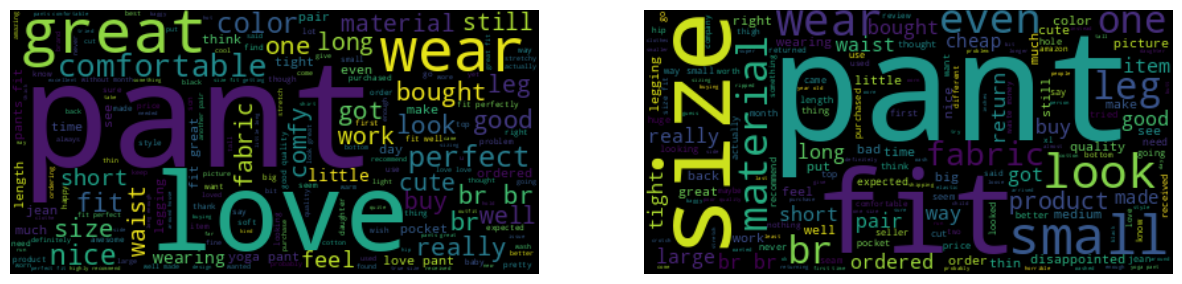

In [ ]:
# Create and generate a word cloud image:
pos_wordcloud = WordCloud().generate(pos_alltext)
neg_wordcloud = WordCloud().generate(neg_alltext)

# Display the generated image:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))

plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()
#plt.tight_layout()

## We want to see what are the features leading to positive/high or negative/low reviews in Women's Pants compared to Men's Pants

# **Women Pants v Men Pants**

Next steps in this project:


1. First, we will use Vivian's approach with Naive Bayes Classifier as applied here to Genderless Pants to find features associated with positive (high) and negative (low) ratings in Amazon Reviews for Women's and Men's Pants .

2. Next, we will use Nelly's approach with the word cloud to find the most frequent words to appear in positive (high) and negative (low) ratings on Amazon for Women's and Men's pants.

3. After we submit this project we will use Trinity's approach with the Support Vector Machine (SVM) model to revise the accuracy of the positive and negative review distinctions, and then use the Naive Bayes model again to extract information about the data.




# After this project, we hope to continue with these directions:

* **Trinity's idea:** SVM and predictive model to recommend products for men and women based on customer's previous reviews.

We can find gender-specifically titled/marketed products, build a training dataset, use the svm to find nonlinear relationships. For example, that could predict whether a clothing item will classified as woman or man, should be marketed to woman or man, or if a specific gender will like or dislike a new product based on the training data of previous reviews. Prediction would be the regression side of the SVM, and then classifying woman/man, like or dislike would be the classification side. This is the basis of recommendation models. We could continue to train the model based on whether the client buys the recommended item and on their latest reviews.

* **Vivian's idea:** Regression and predictive model for binary sentiment. Focus on Genderless Pants as a category for market.

We can continue using sentiment analysis to predict if a review would be positive or negative, and build a predictive model. After the data has been classified by sentiment analysis, we can use logistic regression. We can convert text into numerical value, positive or negative, then use that as 0/1 value as predictor. The model will take the numerically expressed features as input, and the output is predicted binary sentiment.

The Genderless Pants also have more High Ratings and less Low Ratings than BOTH Men's Pants and Women's pants, so we can continue to find features in the Amazon Reviews to expand this product as a category for NonBinary customers.